
# 📕 Trouver les contours avec Canny
Dans ce dernier chapitre, nous allons apprendre à détecter les bords, les coins, et les visages des gens ! 
En utilisant des fonctions de construction qui le font très rapidement et avec seulement quelques lignes de code. 
La détection des contours est très utilisée lorsque nous voulons diviser l'image en zones correspondant à différents objets.

## 📌 Détection des contours
Dans le chapitre précédent, nous avons vu comment détecter les bords à l'aide de la technique de filtrage de Sobel. 
Nous allons maintenant nous familiariser avec l'une des techniques de détection des contours les plus utilisées, la détection des contours de Canny. 
Cette méthode est largement considérée comme la méthode standard de détection des bords dans le traitement des images. 
Elle permet de détecter les bords avec une plus grande précision et un temps d'exécution plus court que l'algorithme de Sobel.

Le détecteur peut être appliqué avec la fonction Canny du module de caractéristiques de scikit-image. 
Cette fonction nécessite que l'image soit un tableau à deux dimensions, c'est-à-dire une image en niveaux de gris. 
Ainsi, dans cet exemple, nous convertissons l'image de RGB-3 en niveaux de gris, en utilisant la méthode rgb2gray du module couleur que nous connaissons déjà dans les chapitres précédents. 
Ensuite, nous appliquons le détecteur de canny sur l'image de la pièce et nous obtenons l'image résultante.

```python
from skimage.feature import canny

# Convertir l'image en niveaux de gris
coins = color.rgb2gray(coins)

# Appliquer le détecteur de Canny
canny_edges = canny(coins)

# Afficher l'image résultante avec des bords
show_image(canny_edges, "Bords avec Canny")
```


## 📌 Détecteur de bords de Canny
La première étape de cet algorithme est d'appliquer un filtre gaussien afin d'éliminer le bruit dans l'image. Le même filtre gaussien que nous avons vu précédemment dans le cours avec la fonction gaussienne du module filtres. 
Ainsi, dans la fonction canny, vous pouvez éventuellement définir l'intensité de ce filtre gaussien à appliquer dans l'image, en utilisant l'attribut sigma. 
Plus la valeur de ce sigma est faible, moins l'effet du filtre gaussien est appliqué à l'image, ce qui permet de repérer davantage de bords. 
D'autre part, si vous définissez une valeur plus élevée, plus de bruit sera supprimé et le résultat sera une image moins tranchante. 
La valeur par défaut de ce paramètre est 1. Dans cet exemple, nous l'avons fixé à 0.5, voyons l'effet dans l'image.

```python
# Application d'un Canny avec sigma = 0.5
canny_edges_0_5 = canny(coins, sigma=0.5)

# Affichage des images avec contours
show_image(canny_edges, "Sigma = 1")
show_image(canny_edges_0_5, "Sigma = 0.5")
```

En utilisant ceci, l'image résultante aura beaucoup plus de bords que la précédente et ceci parce que le bruit a été supprimé avant de continuer avec le reste des étapes de l'algorithme.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

plt.rcParams['figure.figsize'] = (10, 8)

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Originale')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

<br/>

## 📝 Contours
Dans cet exercice, vous allez identifier les formes dans une image de pamplemousse en détectant les bords, en utilisant l'algorithme de Canny.

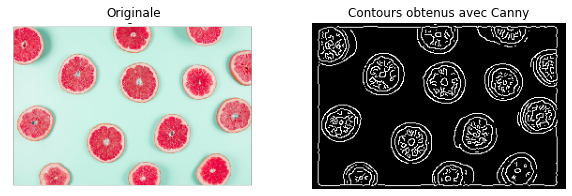

In [20]:
from skimage.feature import canny
from skimage import color

grapefruit = imread('data/CM_SampleImages/Chapter4/toronjas.png')

# Convert image to grayscale
grapefruitb = color.rgb2gray(color.rgba2rgb(grapefruit))

# Apply canny edge detector
canny_edges = canny(grapefruitb)

# Show resulting image
plot_comparison(grapefruit, canny_edges, "Contours obtenus avec Canny")

## 📝Less "edgy"

Essayons maintenant de repérer uniquement la forme extérieure des pamplemousses, les cercles. Vous pouvez le faire en appliquant un filtre gaussien plus intense pour rendre l'image plus lisse. Cela peut être réalisé en spécifiant un sigma plus grand dans la fonction canny.

Dans cet exercice, vous allez expérimenter les valeurs sigma de la fonction <code>canny()</code>.

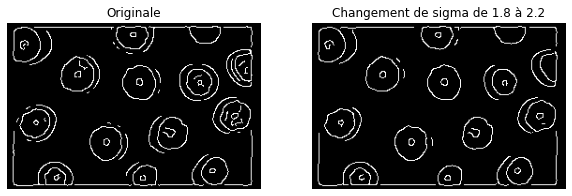

In [21]:
edges_1_8 = canny(grapefruitb, sigma=1.8)

# Canny avec sigma of 2.2
edges_2_2 = canny(grapefruitb, sigma=2.2)

# Affichage des résultats
plot_comparison(edges_1_8, edges_2_2, 'Changement de sigma de 1.8 à 2.2')

<br/><br/>

# 📕 Détection des coins
La détection des coins est une approche utilisée pour extraire certains types de caractéristiques et déduire le contenu d'une image. 
Elle est fréquemment utilisée dans la détection de mouvements, le recalage d'images, le suivi vidéo, l'assemblage de panoramas, la modélisation 3D et la reconnaissance d'objets. 
Nous avons vu dans la vidéo précédente comment détecter les bords avec le détecteur de bords de Canny, et avant cela avec Sobel, dans le chapitre 2. 
Les contours sont un type de caractéristique dans les images.

<img src="data/CM_SampleImages/Chapter4/corners.png" width="60%" center/>

## 📌 Points d'intérêt
Les caractéristiques sont les points d'intérêt qui fournissent des informations riches sur le contenu de l'image. 
Les points d'intérêt sont des points dans l'image qui sont invariants par rapport aux changements de rotation, de translation, d'intensité et d'échelle. (Fondamentalement, ils sont robustes et fiables). 
Il existe différents points d'intérêt tels que les coins et les bords. 
Ainsi, la détection des coins consiste essentiellement à détecter (un type de) points d'intérêt dans une image.

## 📌 Coins
Un coin peut être défini comme l'intersection de deux arêtes. Intuitivement, il peut également s'agir d'une jonction de contours.

## 📌 Correspondance des coins
En détectant les coins comme des points d'intérêt, nous pouvons faire correspondre des objets de différentes perspectives. 
Comme dans cette image, où nous détectons les coins de l'image originale à gauche et les faisons correspondre dans une image réduite à droite.

<img src="data/CM_SampleImages/Chapter4/originalVsTransformed.png" width="600" center/>

## 📌 Détecteur de coins de Harris
Le détecteur de coins de Harris est un opérateur de détection de coins qui est largement utilisé dans les algorithmes de vision par ordinateur. 
Ici, nous voyons l'image originale d'un bâtiment, et à droite, nous voyons les coins détectés par l'algorithme de Harris, marqués en rouge.

<img src="data/CM_SampleImages/Chapter4/cornersD.png" width="60%" center/>

Nous pouvons y accéder en important la fonction corner_harris du module feature de scikit-image. 
Cette fonction nécessite des images en niveaux de gris, nous devons donc d'abord convertir l'image de rgb en gris. 
Nous pouvons le faire avec la fonction rgb2gray que nous avons utilisée précédemment. 
Cette fonction corner_harris nous donne l'image de la mesure de Harris, c'est-à-dire l'image résultante montrant seulement les coins possibles qui ont été mesurés. 

```python
from skimage.feature import corner_harris

# Convertir l'image en niveaux de gris
image = rgb2gray(image)

# Appliquer le détecteur de coins de Harris sur l'image
measure_image = corner_harris(image)

# Afficher l'image de la réponse de Harris
show_image(measure_image)
```
<br/>
<img src="data/CM_SampleImages/Chapter4/harrisResponse.png" width="60%" center/>

Nous voyons que seules quelques lignes noires sont représentées. 
Ce sont les points approximatifs où se trouvent les coins candidats.

Pour trouver les coins dans l'image de la réponse à la mesure, nous pouvons utiliser la fonction corner_peaks.
Celle-ci renvoie les coordonnées des pics des coins possibles. 
En option, nous pouvons nous assurer que ces sommets sont séparés par une distance minimale, en pixels, en utilisant le paramètre min_distance. 
Ici, nous fixons la distance minimale entre les coins à 5 pixels. 
Dans cette image, un total de 122 coins a été trouvé à partir de l'image de la réponse à la mesure.

```python
# Recherche des coordonnées des coins
coords = corner_peaks(corner_harris(image), min_distance=5)

print("Un total de", len(coords), "coins ont été trouvés.")
```

<code>Un total de 122 coins ont été trouvés.</code>

## 📌 Corners detected
```python
# Afficher l'image avec des marques aux endroits identifiés
show_image_with_detected_corners(image, coords)
```
<img src="data/CM_SampleImages/Chapter4/corners_detected.png" width="60%" center/>


<br/><br/>

##  📝Perspective
n this exercise, you will detect the corners of a building using the Harris corner detector.

In [22]:
def show_image_with_corners(image, coords, title="coins détectés"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')


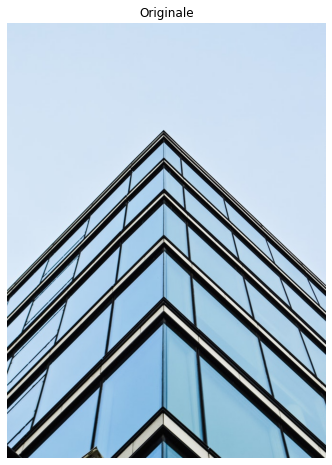

In [23]:
from skimage.feature import corner_harris, corner_peaks

building_image = imread('data/CM_SampleImages/Chapter4/corners_building_top.jpg')

# Convertir l'image de RGB en échelle de gris.
building_image_gray = color.rgb2gray(building_image)

# Appliquer le détecteur pour mesurer les coins possibles
measure_image = corner_harris(building_image_gray)

# Trouver les pics des coins en utilisant le détecteur de Harris
coords = corner_peaks(measure_image, min_distance=2, threshold_rel=0)

# Montrer l'image originale et l'image résultante avec les coins détectés
show_image(building_image, 'Originale')

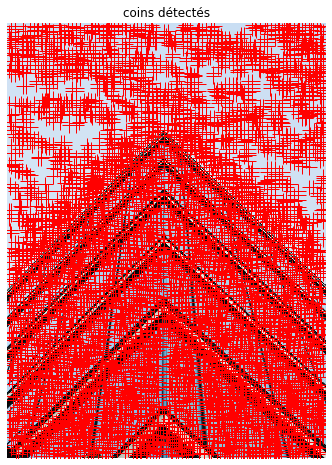

In [24]:
show_image_with_corners(building_image, coords)

<br/><br/>

##  📝 Moins de coins
Dans cet exercice, vous allez tester ce qui se passe lorsque vous fixez la distance minimale entre les sommets des coins à un nombre plus élevé. Rappelez-vous que vous faites cela avec le paramètre d'attribut min_distance de la fonction corner_peaks().

In [25]:
coords_w_min_2 = corner_peaks(measure_image, min_distance=2, threshold_rel=0)
print("Avec une distance minimale fixée à {}, nous détectons un total de {} coins dans l'image.".format(2, len(coords_w_min_2)))
# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40, threshold_rel=0)
print("Avec une distance minimale fixée à {}, nous détectons un total de {} coins dans l'image.".format(40, len(coords_w_min_40)))


Avec une distance minimale fixée à 2, nous détectons un total de 6216 coins dans l'image.
Avec une distance minimale fixée à 40, nous détectons un total de 58 coins dans l'image.


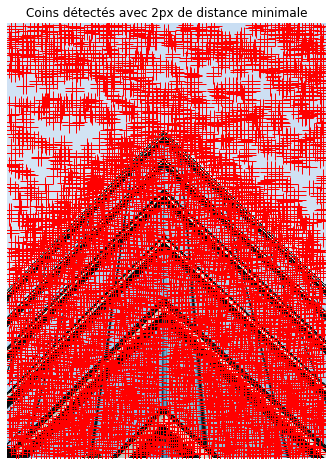

In [26]:
show_image_with_corners(building_image, coords_w_min_2, "Coins détectés avec 2px de distance minimale")

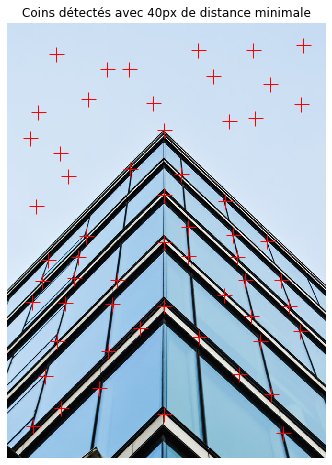

In [27]:
show_image_with_corners(building_image, coords_w_min_40, "Coins détectés avec 40px de distance minimale")

<br/><br/>

# 📕 Détection des visages
Au cours des dernières années, la détection des visages a attiré beaucoup d'attention et a eu un grand impact sur les processus automatisés grâce à la vision artificielle. 

## 📌 Cas d'utilisation de la détection des visages
- Filtres
- Mise au point automatique
- Recommandations
- Flou pour la protection de la vie privée
- Reconnaître les émotions

## 📌 Détection de visages avec scikit-image
Avec scikit-image, nous pouvons détecter les visages à l'aide d'un classificateur d'apprentissage automatique, en quelques lignes seulement ! 
Dans ce cours, nous ne couvrirons pas les concepts d'apprentissage automatique en profondeur, mais il est important de savoir que nous utilisons une cascade de classificateurs, qui est comme plusieurs classificateurs en un. 
Vous pouvez également l'utiliser pour d'autres choses, comme des chats, des objets ou des visages de profil, en vue de côté.

<img src="data/CM_SampleImages/Chapter4/face_detection.png" width="70%" center/>

Pour utiliser le détecteur de visage, nous importons la classe Cascade du module de fonctionnalité. 
Ce framework de détection a besoin d'un fichier xml, à partir duquel les données entraînées peuvent être lues.
Dans ce cas, nous utiliserons les fichiers de visages frontaux qui sont inclus dans le module de données de scikit-image. 
Ensuite, initialiser le détecteur, en utilisant le constructeur de la classe Cascade. 
Maintenant, nous avons maintenant le détecteur prêt à être utilisé sur des images.

```python
# Importation de la classe du classifier
from skimage.feature import Cascade

# Chargement du fichier de train à partir du module 'root'
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialisation du detecteur Cascade
detector = Cascade(trained_file)
```

## 📌 Détection des visages
Pour appliquer le détecteur sur des images, nous devons utiliser la méthode detect_multi_scale, de la même classe cascade. 
Cette méthode recherche l'objet, dans ce cas un visage. 
Elle crée une fenêtre qui va se déplacer dans l'image jusqu'à ce qu'elle trouve quelque chose qui ressemble à un visage humain.

<img src="data/CM_SampleImages/Chapter4/ins.png" width="400" center/>

La recherche se fait à plusieurs échelles. La fenêtre aura une taille minimale, pour repérer les visages petits ou éloignés. 
Et une taille maximale pour trouver également les plus grands visages dans l'image.
Cette méthode prend donc l' **image d'entrée** comme premier paramètre, un **facteur d'échelle**, par lequel la fenêtre de recherche est multipliée à chaque étape, un **rapport d'étape**, dans lequel 1 représente une recherche exhaustive et est généralement lent. 
En fixant ce paramètre à des valeurs plus élevées, les résultats seront moins bons mais le calcul sera beaucoup plus rapide. 
Habituellement, des valeurs comprises entre 1 et 1,5 donnent de bons résultats. 
Ensuite, les **taille minimale et maximale de la fenêtre** sont définies. 
Elles spécifient l'intervalle des fenêtres de recherche qui sont appliquées à l'image d'entrée pour détecter les visages.

```python
detected = detector.detect_multi_scale(img=image, 
                                       scale_factor=1.2,
                                       step_ratio=1, 
                                       min_size=(10, 10),
                                       max_size=(200, 200))
```

## 📌 Visages détectés  

```python
print(detected)
# Affichage de l'image avec le visage détecté identifié
show_detected_face(image, detected)
```
<code>Detected face: [{'r': 115, 'c': 210, 'width': 167, 'height': 167}]</code>

<img src="data/CM_SampleImages/Chapter4/ins_detect.png" width="400" center/>

#### Affichage des visages détectés
Avec cette fonction, on trace un rectangle autour des faces détectées. 
Nous ne discuterons pas de cette fonction en détail ici.

```python
def show_detected_face(result, detected, title="Image du visage"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
```

<br/><br/>

##  📝Il y a quelqu'un ?
Dans cet exercice, vous allez vérifier si une personne est présente ou non dans une image prise la nuit.

In [28]:
import matplotlib.patches as patches

def crop_face(result, detected, title="Visage détecté"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

def show_detected_face(result, detected, title="Image du visage"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

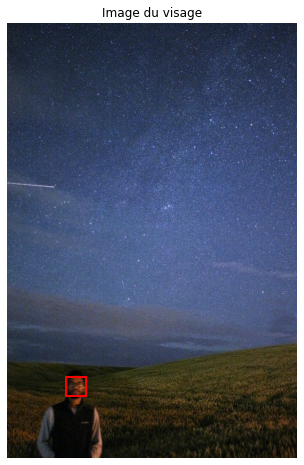

{'r': 773, 'c': 129, 'width': 43, 'height': 43}


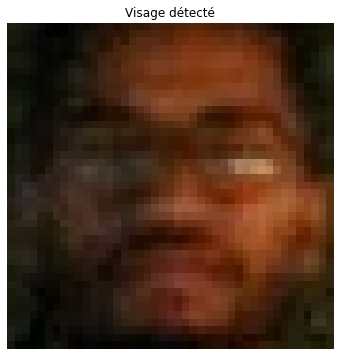

In [29]:
from skimage import data
from skimage.feature import Cascade

night_image = imread('data/CM_SampleImages/Chapter4/face_det3.jpg')

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img=night_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(10, 10), max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

<br/><br/>

##  📝Visages multiples
Dans cet exercice, vous allez détecter plusieurs visages dans une image et les afficher individuellement.
Pensez-y comme un moyen de créer un ensemble de données sur les visages de vos propres amis !

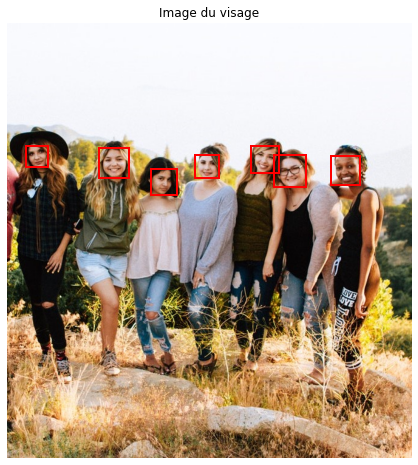

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


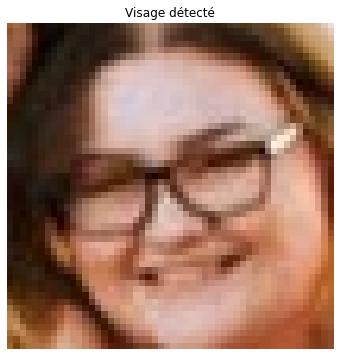

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


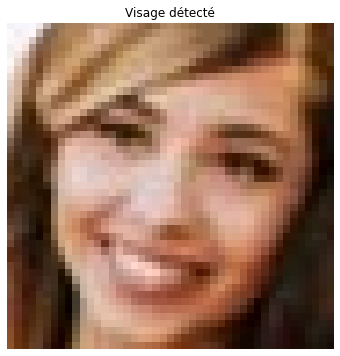

{'r': 206, 'c': 151, 'width': 49, 'height': 49}


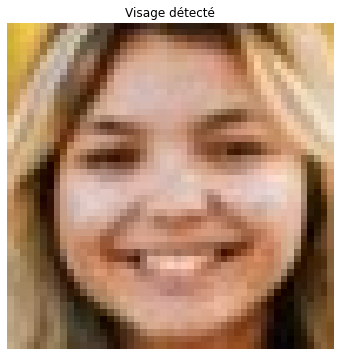

{'r': 202, 'c': 31, 'width': 35, 'height': 35}


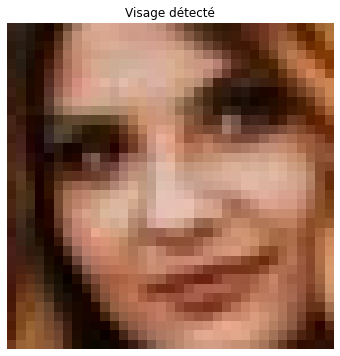

{'r': 217, 'c': 309, 'width': 39, 'height': 39}


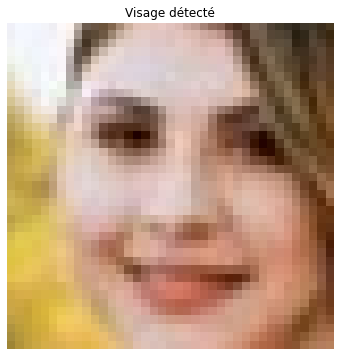

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


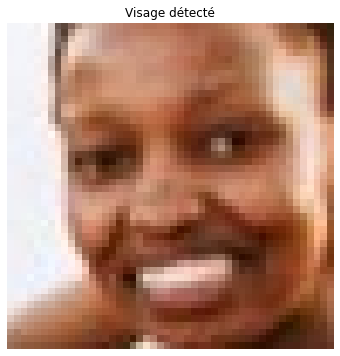

{'r': 241, 'c': 237, 'width': 42, 'height': 42}


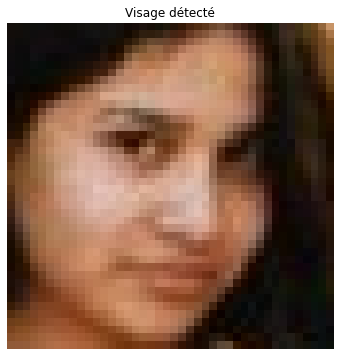

In [30]:
friends_image = imread('data/CM_SampleImages/Chapter4/face_det_friends.jpg')

# Détecter les visages avec un facteur d'échelle de 1.2 et un rapport d'étape de 1.
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Afficher les visages détectés
show_detected_face(friends_image, detected)

<br/><br/>

##  📝Segmentation et détection de visage
Auparavant, vous avez appris à rendre les processus plus efficaces en termes de calcul avec une segmentation superpixel non supervisée. Dans cet exercice, c'est exactement ce que vous ferez !

À l'aide de la fonction <code>slic()</code> pour la segmentation, réaliser le pré-traitement de l'image avant de la transmettre au détecteur de visage.

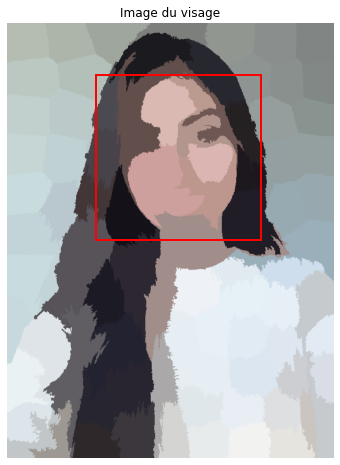

{'r': 105, 'c': 180, 'width': 334, 'height': 334}


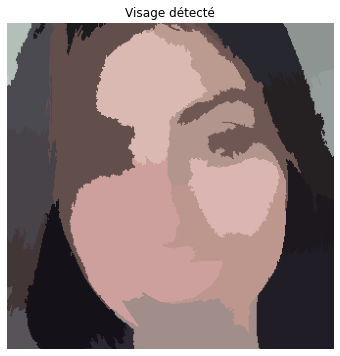

In [31]:
from skimage.segmentation import slic
from skimage.color import label2rgb

profile_image = imread('data/CM_SampleImages/Chapter4/face_det.jpg')

# Obtention de la segmentation avec 100 régions par défaut
segments = slic(profile_image, start_label=1)

# Obtention de l'image segmentée en utilisant label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg', bg_label=0)

# Détection des visages avec la méthode multi-échelle
detected = detector.detect_multi_scale(img=segmented_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(1000, 1000))

# Affichage des visages détectés
show_detected_face(segmented_image, detected)

<br/><br/>

# 📕Applications dans le monde réel
Nous allons maintenant apprendre à appliquer ce que nous avons appris dans des situations du "real-world". Pour ce faire, nous allons combiner des techniques.

## 📌 Applications
- Passage en niveaux de gris avant la détection des bords/coins
- Réduction du bruit et restauration des images
- Détection de visages flous
- Approximation de la taille des objets

## 📌 Protection de la vie privée
Voyons comment résoudre un cas de protection de la vie privée en détectant les visages, puis en les rendant anonymes. Nous allons utiliser cette image pour travailler.

<img src="data/CM_SampleImages/Chapter4/friends.png" width="450" center/>

Donc, pour ce cas en particulier, nous devrons d'abord détecter les visages, en utilisant le détecteur de cascade de classificateurs, puis appliquer un filtre gaussien aux visages recadrés.
```python
# Importation du détecteur de cascade de classifieurs et un filtre gaussien
from skimage.feature import Cascade
from skimage.filters import gaussian
```
<br/>
Ainsi, avec le détecteur de visage initialisé et prêt à l'emploi, nous pouvons commencer à détecter les visages. Pour chaque visage détecté, comme la variable d, dans la liste détectée, nous allons utiliser les coordonnées pour le recadrer de l'image, c'est-à-dire l'extraire.

```python
# Détection des visages
detected = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(50, 50),
                                       max_size=(100, 100))
# Pour chaque visage détecté
for d in detected:
    # Obtention du visage recadré à partir des coordonnées détectées
    face = getFace(d)
```

<br/>
Cette fonction <code>getFace()</code> découpe le visage de l'image, en utilisant le dictionnaire des visages détectés qui contient les coordonnées. 
Ensuite, nous allons dessiner un rectangle autour du visage détecté de l'image. 
En prenant r, qui est la position de la ligne du coin supérieur gauche du rectangle détecté comme position de départ X et c, qui est la colonne comme position de départ Y.

```python
def getFace(d):
    # Extraction du rectangle du visage de l'image en utilisant les coordonnées du visage détecté.
   
    # X et Y points de départ du rectangle du visage
    x, y = d['r'], d['c']
    
    # La largeur et la hauteur du rectangle du visage
    width, height = d['r'] + d['width'], d['c'] + d['height']
    
    # Extraction du visage détecté
    face= image[x:width, y:height]
    
    return face
```

Ce sont les points à partir desquels nous allons maintenant ajouter une largeur et une hauteur pour compléter le rectangle. Et c'est exactement ce que nous faisons ensuite, nous ajoutons la hauteur et la largeur aux points de départ. Nous avons donc les dimensions du rectangle dans l'image. Nous spécifions ensuite ces dimensions dans l'image d'origine à partir de laquelle le visage a été détecté afin de pouvoir le recadrer.

<br/>
Maintenant que le visage est recadré de l'image, nous allons appliquer le filtre gaussien pour le rendre flou et le rendre méconnaissable. Cette
l'image résultante est affectée à la variable gaussian_face.

```python
# Détection des visages
detected = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(50, 50),
                                       max_size=(100, 100))
# Pour chaque visage détecté
for d in detected:
    # Obtention du visage isolé à partir des coordonnées obtenues
    face = getFace(d)
    
    # Application d'un filtre gaussien sur les visages obtenus
    gaussian_face = gaussian(face, multichannel=True, sigma = 10)
    
    # Fusion de ce visage flou avec notre image finale et affichage final
    resulting_image = mergeBlurryFace(image, gaussian_face)
```

<br/>
Comme dernière étape, nous allons fusionner le visage flou à nouveau à l'image, en utilisant une autre fonction appelée <code>mergeBlurryFace()</code> Pour ce faire, nous spécifions à nouveau les points de départ X et Y ainsi que la largeur et la hauteur, afin de découper l'image originale. Ensuite, le visage flou est affecté au résultat.

```python
def mergeBlurryFace(original, gaussian_image):
    # Les points de départ X et Y du rectangle du visage.
    x, y = d['r'], d['c'] 
    # La largeur et la hauteur du rectangle de la face
    width, height = d['r'] + d['width'], d['c'] + d['height']
    
    original[ x:width, y:height] = gaussian_image
    return original
```

<img src="data/CM_SampleImages/Chapter4/blurr_faces.png" width="450" center/>

Il en résulte donc une image qui ne contient plus les visages des personnes et, de cette manière, les données personnelles sont anonymisées

<br/><br/>

##  📝 Protection de la vie privée
Prenons une application réelle de ce que vous avez appris dans ce cours.

Dans cet exercice, vous allez détecter des visages humains dans l'image et, au nom de la protection de la vie privée, vous allez anonymiser les données en floutant automatiquement les visages des personnes dans l'image.

Vous pouvez utiliser le filtre gaussien pour le flou.

In [32]:
def getFaceRectangle(image, d):
    ''' Extraction du visage à partir de l'image en utilisant les coordonnées de l'image détectée. '''
    # Points de départ X et Y du rectangle de la face
    x, y  = d['r'], d['c']
    
    # La largeur et la hauteur du rectangle du visage
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extraction du visage détecté
    face= image[ x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
     # Points de départ X et Y du rectangle du visage
    x, y  = d['r'], d['c']
    # La largeur et la hauteur du rectangle du visage
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] = gaussian_image
    return original

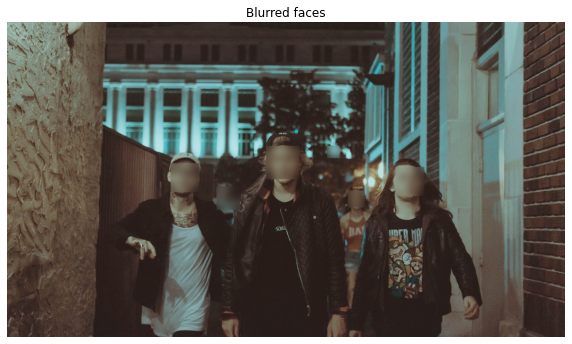

In [33]:
from skimage.filters import gaussian

group_image = imread('data/CM_SampleImages/Chapter4/face_det25.jpg')

# Détection des visages
detected = detector.detect_multi_scale(img=group_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10), max_size=(100, 100))

# Pour chaque visage détecté
for d in detected:
    # Obtention du rectangle du visage à partir des coordonnées détectées
    face = getFaceRectangle(group_image, d)
    
    # Application du filtre gaussien au visage extrait
    blurred_face = gaussian(face, channel_axis=-1, sigma=8, preserve_range=True)
    
    # Fusion de ce visage flou à notre image finale et affichage
    resulting_image = mergeBlurryFace(group_image, blurred_face)
    
show_image(resulting_image, 'Blurred faces')

<br/>

##  📝 Aidez Sally à restaurer sa photo de fin d'études
Vous allez combiner toutes les connaissances que vous avez acquises tout au long du cours pour relever un dernier défi : reconstruire une photo très endommagée.

Aidez Sally à restaurer son portrait préféré qui a été endommagé par du bruit, de la distorsion et des informations manquantes en raison d'une brèche dans son ordinateur portable.

Vous allez résoudre les problèmes de cette image en :

- La faisant pivoter pour qu'elle soit droite en utilisant rotate()
- Appliquant une réduction du bruit avec denoise_tv_chambolle()
- Reconstruisant les parties endommagées avec inpaint_biharmonic() du module inpaint.

In [34]:
def get_mask(image):
    # Création d'un masque avec trois régions de défauts : gauche, milieu, droite respectivement.
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

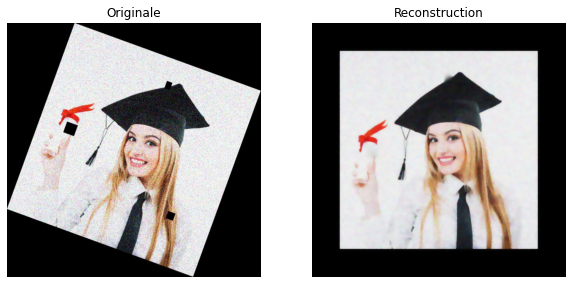

In [35]:
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

damaged_image = imread('data/CM_SampleImages/Chapter4/sally_damaged_image.jpg')

# Transformation de l'image pour qu'elle ne soit pas en rotation
upright_img = transform.rotate(damaged_image, 20)

# Élimination du bruit de l'image, en utilisant la méthode de Chambolle
upright_img_without_noise = denoise_tv_chambolle(upright_img, weight=0.1, channel_axis=-1)

# Reconstruction des parties manquantes de l'image
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, channel_axis=-1)

# Affichage de l'image résultante
plot_comparison(damaged_image, result, "Reconstruction")